In [9]:
import pandas as pd
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("CA_Results_Test - Sheet1.csv", delimiter=',')
df = df.rename(columns={'Clearness L': 'L Interpretability', 'Clearness G': 'G Interpretability', 'Clearness C': 'C Interpretability', 
                       'Trust L': 'L Trust', 'Trust G': 'G Trust', 'Trust C': 'C Trust'})
df

,L Interpretability,G Interpretability,C Interpretability,L Trust,G Trust,C Trust,Interpretability,Usefulness
0,2,2,2,2,2,4,Global,Combined
1,4,4,4,3,4,4,Global,Combined
2,2,3,4,2,2,3,Combined,Combined
3,4,5,5,4,4,4,Combined,Combined
4,3,4,4,4,4,4,Global,Combined
5,5,4,4,3,3,4,Local,Combined
6,4,4,4,3,4,3,Combined,Combined
7,3,4,3,2,3,3,Combined,Combined
8,3,3,4,3,3,4,Local,Local
9,4,4,4,3,4,3,Global,Global


In [5]:
interpretability_cols = ['L Interpretability', 'G Interpretability', 'C Interpretability']
trust_cols = ['L Trust', 'G Trust', 'C Trust']

In [6]:
def perform_paired_ttests(data, cols, category):
    results = {}
    pairs = [(cols[0], cols[1]), (cols[0], cols[2]), (cols[1], cols[2])]
    
    for (col1, col2) in pairs:
        stat, p_value = ttest_rel(data[col1], data[col2])
        results[f'{col1} vs {col2}'] = {'t-statistic': stat, 'p-value': p_value}
    print(f'\nPaired t-test results for {category}:\n')
    
    for key, value in results.items():
        print(f'{key}: t-statistic = {value["t-statistic"]}, p-value = {value["p-value"]}')


In [16]:
# Perform paired t-tests for interpretability
perform_paired_ttests(df, interpretability_cols, 'Interpretability')


Paired t-test results for Interpretability:

L Interpretability vs G Interpretability: t-statistic = -2.256304299271065, p-value = 0.040568593140109674
L Interpretability vs C Interpretability: t-statistic = -2.8697202159177566, p-value = 0.012359523203640138
G Interpretability vs C Interpretability: t-statistic = -0.9999999999999998, p-value = 0.33428194339465744


In [17]:
# Perform paired t-tests for trust
trust_results = perform_paired_ttests(df, trust_cols, 'Trust')


Paired t-test results for Trust:

L Trust vs G Trust: t-statistic = -3.5, p-value = 0.003535208105858958
L Trust vs C Trust: t-statistic = -3.1622776601683795, p-value = 0.006920652515844045
G Trust vs C Trust: t-statistic = -0.8987170342729172, p-value = 0.384000221360309


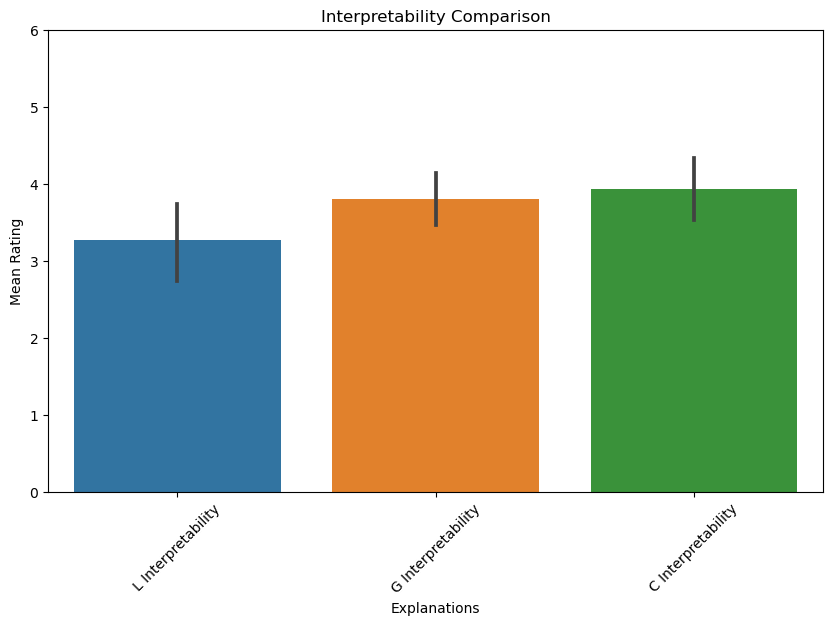

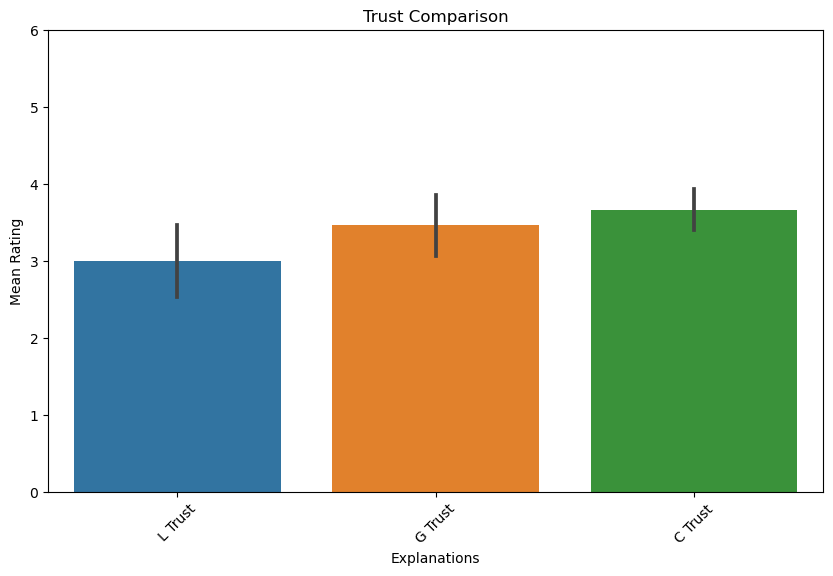

In [30]:

def plot_results(data, cols, category):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data[cols])
    plt.title(f'{category} Comparison')
    plt.ylabel('Mean Rating')
    plt.xlabel('Explanations')
    plt.ylim(0, data[cols].max().max() + 1)  # Adjust y-axis limit
    plt.xticks(ticks=range(len(cols)), labels=cols, rotation=45)
    plt.show()

# Plot results for interpretability
plot_results(df, interpretability_cols, 'Interpretability')

# Plot results for trust
plot_results(df, trust_cols, 'Trust')